In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns

from scipy.stats import pearsonr

sns.set_style("darkgrid")
np.random.seed(930525)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

warnings.simplefilter('once')

%matplotlib inline
%load_ext watermark
%watermark --iversions

pandas  1.1.4
numpy   1.18.4
seaborn 0.10.1



In [3]:
from glob import glob

import joblib

classifiers = []

for file in glob("../data/clf.sklearn.*"):
    clf = joblib.load(file)
    classifiers.append(clf)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 0.24.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packa

In [4]:
X = joblib.load("../data/X.pkl")
y = joblib.load("../data/y.pkl")

In [5]:
classifiers[0]

ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_features=0.8,
                     min_samples_leaf=4, min_samples_split=20)

In [6]:
shap.Explainer?

Object `shap.Explainer` not found.


In [7]:
import shap

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.TreeExplainer(classifiers[0])

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [8]:
model = classifiers[0]

In [9]:
pred = clf.predict_proba(X)[:, 0]

In [10]:
# np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

In [11]:
shap_values = explainer.shap_values(X)

In [15]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)

# visualize the first prediction's explanation
shap.plots.waterfall?

Signature: shap.plots.waterfall(shap_values, max_display=10, show=True)
Docstring:
Plots an explantion of a single prediction as a waterfall plot.

The SHAP value of a feature represents the impact of the evidence provided by that feature on the model's
output. The waterfall plot is designed to visually display how the SHAP values (evidence) of each feature
move the model output from our prior expectation under the background data distribution, to the final model
prediction given the evidence of all the features. Features are sorted by the magnitude of their SHAP values
with the smallest magnitude features grouped together at the bottom of the plot when the number of features
in the models exceeds the max_display parameter.

Parameters
----------
shap_values : Explanation
    A one-dimensional Explanation object that contains the feature values and SHAP values to plot.

max_display : str
    The maximum number of features to plot.

show : bool
    Whether matplotlib.pyplot.show() is ca

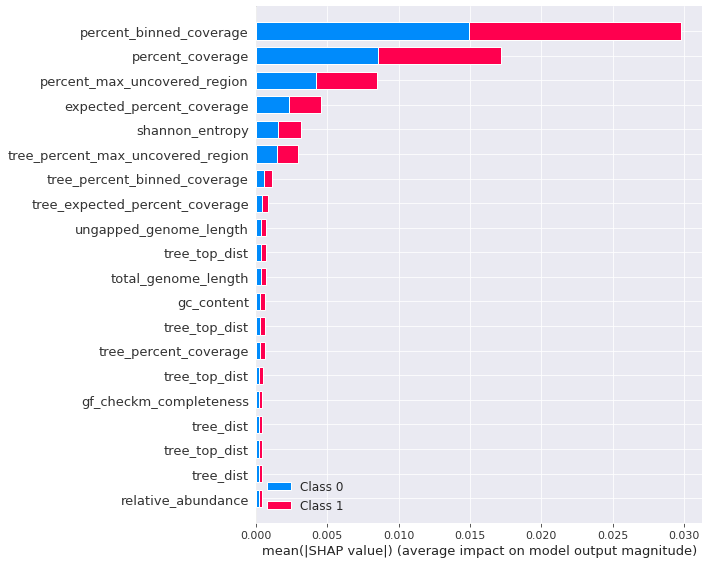

In [16]:
shap.summary_plot(shap_values, X)

In [17]:
shap.plots.beeswarm?

Signature:
shap.plots.beeswarm(
    shap_values,
    max_display=10,
    order=shap.Explanation.abs.mean(0),
    clustering=None,
    cluster_threshold=0.5,
    color=None,
    axis_color='#333333',
    alpha=1,
    show=True,
    log_scale=False,
    color_bar=True,
    plot_size='auto',
    color_bar_label='Feature value',
)
Docstring:
Create a SHAP beeswarm plot, colored by feature values when they are provided.

Parameters
----------
shap_values : Explanation
    This is an Explanation object containing a matrix of SHAP values (# samples x # features).

max_display : int
    How many top features to include in the plot (default is 20, or 7 for interaction plots)

plot_size : "auto" (default), float, (float, float), or None
    What size to make the plot. By default the size is auto-scaled based on the number of
    features that are being displayed. Passing a single float will cause each row to be that 
    many inches high. Passing a pair of floats will scale the plot by that
    

In [20]:
shap.plots.beeswarm?

Signature:
shap.plots.beeswarm(
    shap_values,
    max_display=10,
    order=shap.Explanation.abs.mean(0),
    clustering=None,
    cluster_threshold=0.5,
    color=None,
    axis_color='#333333',
    alpha=1,
    show=True,
    log_scale=False,
    color_bar=True,
    plot_size='auto',
    color_bar_label='Feature value',
)
Docstring:
Create a SHAP beeswarm plot, colored by feature values when they are provided.

Parameters
----------
shap_values : Explanation
    This is an Explanation object containing a matrix of SHAP values (# samples x # features).

max_display : int
    How many top features to include in the plot (default is 20, or 7 for interaction plots)

plot_size : "auto" (default), float, (float, float), or None
    What size to make the plot. By default the size is auto-scaled based on the number of
    features that are being displayed. Passing a single float will cause each row to be that 
    many inches high. Passing a pair of floats will scale the plot by that
    

In [23]:
shap_obj = explainer(X)

In [24]:
# shap.plots.beeswarm(shap_obj)

NameError: name 'plot_type' is not defined

In [ ]:
X['percent_coverage'].max()

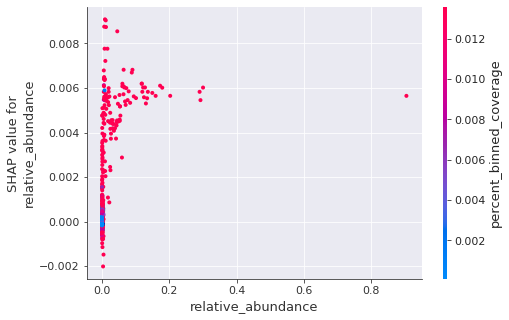

In [25]:
shap.dependence_plot("relative_abundance", shap_values[1], X, interaction_index = "percent_binned_coverage")

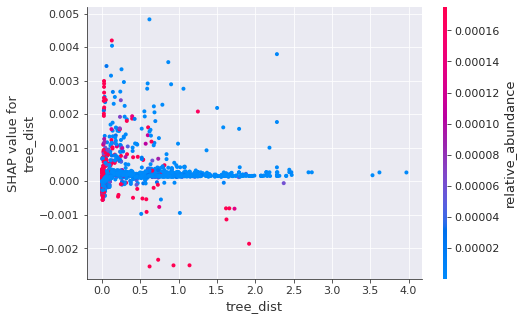

In [26]:
shap.dependence_plot("tree_dist", shap_values[1], X, interaction_index = "relative_abundance")

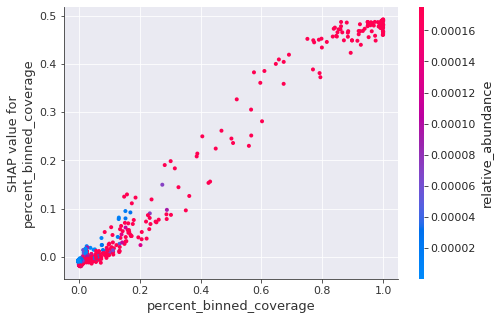

In [27]:
shap.dependence_plot("percent_binned_coverage", shap_values[1], X, interaction_index = "relative_abundance")

In [ ]:
# for name in X.columns:
#     shap.dependence_plot(name, shap_values[1], X)